# Transforming Data into Features

This dataset is originally from Kaggle and has a lot of potential for various machine learning purposes. You are tasked with transforming some of these features to make the data more useful for analysis. To do this, you will have time to practice the following:

- Transforming categorical data
- Scaling your data
- Working with date-time features
- Let’s get started!

### Basic Exploration

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
reviews = pd.read_csv('reviews.csv')

In [128]:
reviews.head(1)

,clothing_id,age,review_title,review_text,recommended,division_name,department_name,review_date,rating
0,1095,39,"Cute,looks like a dress on",If you are afraid of the jumpsuit trend but li...,True,General,Dresses,2019-07-08,Liked it


In [129]:
reviews.columns

Index(['clothing_id', 'age', 'review_title', 'review_text', 'recommended',
       'division_name', 'department_name', 'review_date', 'rating'],
      dtype='object')

In [130]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clothing_id      5000 non-null   int64 
 1   age              5000 non-null   int64 
 2   review_title     4174 non-null   object
 3   review_text      4804 non-null   object
 4   recommended      5000 non-null   bool  
 5   division_name    4996 non-null   object
 6   department_name  4996 non-null   object
 7   review_date      5000 non-null   object
 8   rating           5000 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 317.5+ KB


### Variables checking


### Data Transformations

#### 1. recommended feature

`ordinal encoding`


In [131]:
# Since this is a True/False feature, we want to transform it to 1 for True and 0 for False.
reviews['recommended'].value_counts()

True     4166
False     834
Name: recommended, dtype: int64

In [132]:
recommended_dict = {True:1, False:0}

In [133]:
reviews['recommended'] = reviews['recommended'].map(recommended_dict)
reviews.recommended.value_counts()

1    4166
0     834
Name: recommended, dtype: int64

#### 2. rating feature

`ordinal encoding`

In [134]:
reviews.rating.value_counts()

Loved it     2798
Liked it     1141
Was okay      564
Not great     304
Hated it      193
Name: rating, dtype: int64

In [135]:
rating_dict = {'Loved it':5, 'Liked it':4, 'Was ok':3,'Not great':2, 'Hated it':1}

In [136]:
reviews['rating'] =  reviews['rating'].map(rating_dict)
reviews['rating'].value_counts()

5.0    2798
4.0    1141
2.0     304
1.0     193
Name: rating, dtype: int64

#### 3. department_name feature

`ohe`

In [137]:
reviews.department_name.value_counts()

Tops        2196
Dresses     1322
Bottoms      848
Intimate     378
Jackets      224
Trend         28
Name: department_name, dtype: int64

In [138]:
ohe = pd.get_dummies(reviews['department_name'])
reviews = reviews.join(ohe)

#### 4. review_date

`date-time encoding`

In [139]:
#verify first
reviews.review_date.dtypes

dtype('O')

In [140]:
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
reviews.review_date.dtype

dtype('<M8[ns]')

In [141]:
reviews['review_date'].dt.day.head(2)

0     8
1    17
Name: review_date, dtype: int64

#### 5. `Scaling the data`

We notice that we have a wide range of numbers thus far, so it is best to put everything on the same scale.

Let’s get our data frame to only have the numerical features we created

In [142]:
reviews.describe().head(2)

,clothing_id,age,recommended,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
count,5000.000,5000.0000,5000.0000,4436.000000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,918.505,43.2712,0.8332,4.363165,0.1696,0.2644,0.0756,0.0448,0.4392,0.0056


In [154]:
#get numerical columns
# Create a copy
reviews_numeric = reviews[['clothing_id', 'age', 'recommended', 'rating', 'Bottoms', 'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend']].copy()

In [155]:
# Reset the index to be our clothing_id feature.
reviews_numeric = reviews_numeric.set_index('clothing_id')

In [156]:
reviews_numeric.describe().head(2)

,age,recommended,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
count,5000.0000,5000.0000,4436.000000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,43.2712,0.8332,4.363165,0.1696,0.2644,0.0756,0.0448,0.4392,0.0056


In [159]:
reviews_numeric.head(3)

,age,recommended,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
clothing_id,,,,,,,,,
1095,39,1,4.0,0,1,0,0,0,0
1095,28,1,5.0,0,1,0,0,0,0
699,37,1,5.0,0,0,1,0,0,0


In [160]:
#summary statistics
reviews_numeric.describe()

,age,recommended,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
count,5000.000000,5000.000000,4436.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.271200,0.833200,4.363165,0.169600,0.264400,0.075600,0.044800,0.439200,0.005600
std,12.269693,0.372834,1.079265,0.375319,0.441057,0.264383,0.206885,0.496339,0.074631
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,99.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


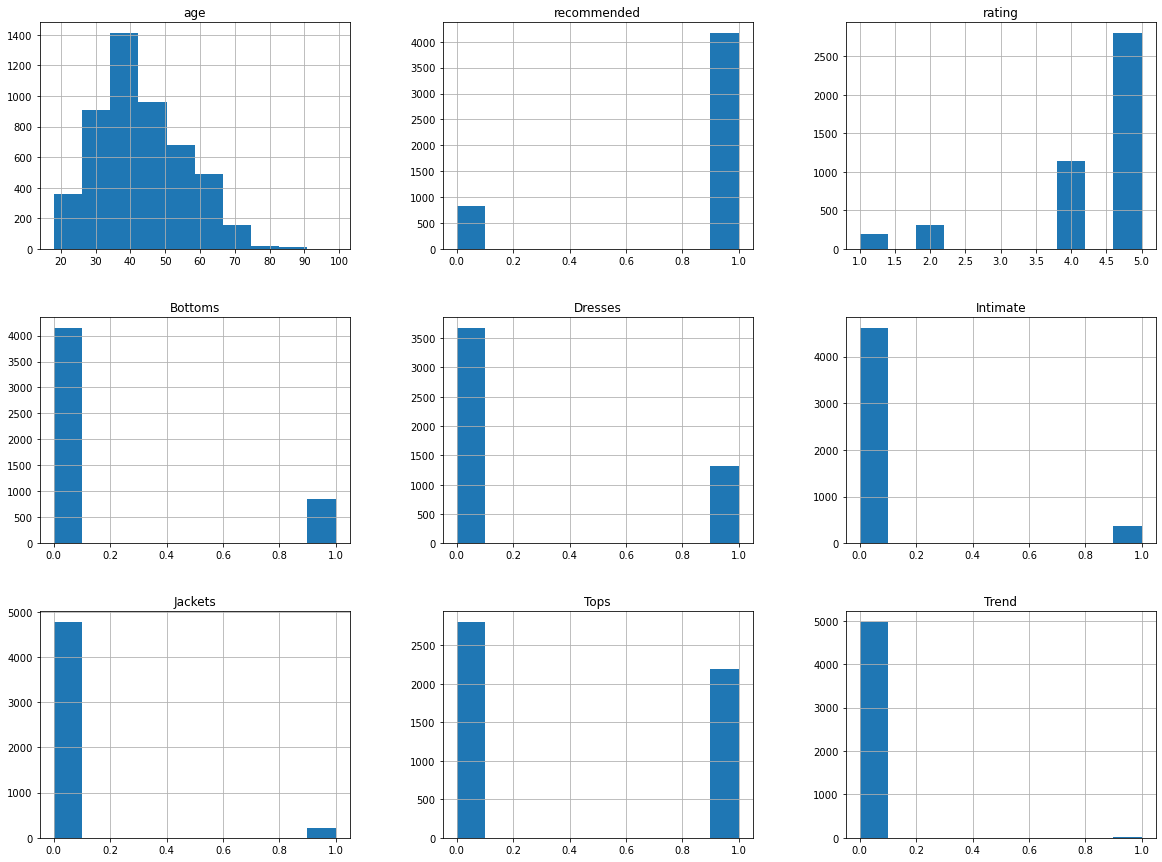

In [161]:
#plot all distributions
reviews_numeric.hist(figsize = (20,15), layout = (3,3))
plt.show()

In [172]:
# Scale all
cols = []
for i in reviews_numeric.columns:
    cols.append(i)

features = reviews_numeric[cols]    
    
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
    
reviews_numeric[cols] = features

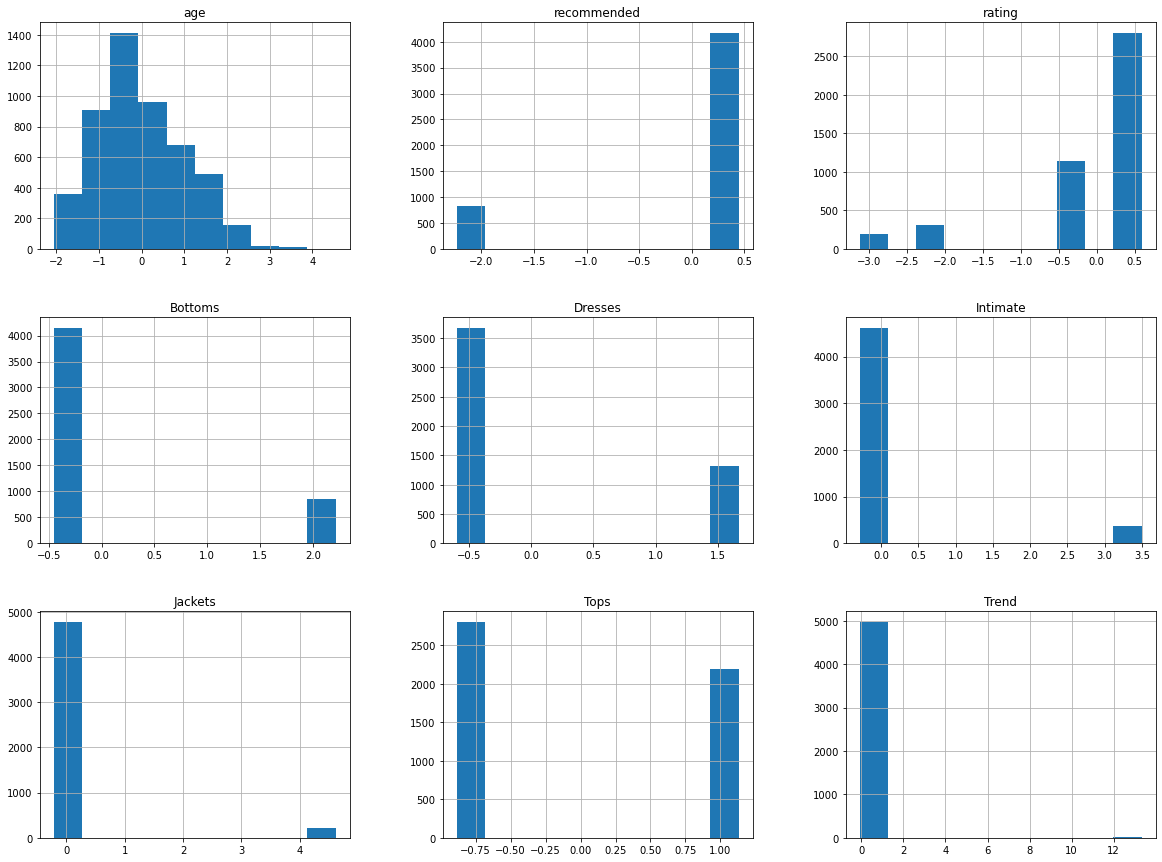

In [173]:
reviews_numeric.hist(figsize = (20,15), layout = (3,3))
plt.show()

In [177]:
# verify
reviews_numeric.rating.std()

1.0001127332172184